## 1. Introduction

Web analytics is a fascinating domain and important target of data science. Seeing where people come from (geographical information), what they do (behavioral analyses), how they visit (device: mobile, tablet or workstation), and when they visit your website (time-related info, frequency etc), are all different metrics of webtraffic that have potential business value. Google Analytics is one of the available opensource tools that is highly used and well-documented.

The current code showa how to implement web analytics in Python. Google Analytics has a rich variety of metrics and dimensions available. It has a good
visualization and an intuitive Graphic User Interface (GUI). However, in certain situations it makes sense to automate webanalytics and add advanced statistics and
visualizations. In the current code, I will show how to do that using Python.

To realise these goals, what follows are the analytical steps needed from data acquisition to visualization. If at this moment we are not able to run Google Analytics for your own website but want to nevertheless reproduce the data analyses in Python, I advice to load the DataFrames (df1, df2, df3, df3a, df3b) from below GitHub site using the following code (change the "df"-filename accordingly).

### Import libraries

In [3]:
!pip install git+https://github.com/panalysis/Google2Pandas

  Cloning https://github.com/panalysis/Google2Pandas to /gpfs/global_fs01/sym_shared/YPProdSpark/user/sfc4-d48bed32151ab8-10b9e724ea57/notebook/tmp/pip-k_tujz-build
    100% |████████████████████████████████| 61kB 1.4MB/s eta 0:00:01
    100% |████████████████████████████████| 204kB 3.7MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 454kB/s a 0:00:011
    100% |████████████████████████████████| 51kB 4.3MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 5.5MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 280kB/s ta 0:00:011
  Running setup.py bdist_wheel for httplib2 ... done
  Stored in directory: /gpfs/fs01/user/sfc4-d48bed32151ab8-10b9e724ea57/.cache/pip/wheels/ca/ac/5f/749651f7925b231103f5316cacca82a487810c22d30f011c0c
Successfully built httplib2
  Running setup.py install for Google2Pandas ... done


In [5]:
!pip install geonamescache

    100% |████████████████████████████████| 972kB 1.0MB/s eta 0:00:01


In [13]:
import geonamescache
from geonamescache import GeonamesCache

In [16]:
import pandas as pd
import numpy as np
from google2pandas import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
from geonamescache.mappers import country
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from scipy import stats
import matplotlib.patches as mpatches
import plotly
import plotly.plotly as py
from IPython.display import Image
from plotly import tools
from plotly.graph_objs import *

### Import sample data files if  google analytics access at this moment is not possible

In [17]:
url = 'https://raw.githubusercontent.com/RRighart/GA/master/df1.csv'
df1 = pd.read_csv(url, parse_dates=True, delimiter=",", decimal=",")

In [41]:
url = 'https://raw.githubusercontent.com/RRighart/GA/master/df2.csv'
df2 = pd.read_csv(url, parse_dates=True, delimiter=",", decimal=",")

In [42]:
url = 'https://raw.githubusercontent.com/RRighart/GA/master/df3.csv'
df3 = pd.read_csv(url, parse_dates=True, delimiter=",", decimal=",")

In [43]:
url = 'https://raw.githubusercontent.com/RRighart/GA/master/df3a.csv'
df3a = pd.read_csv(url, parse_dates=True, delimiter=",", decimal=",")

In [44]:
url = 'https://raw.githubusercontent.com/RRighart/GA/master/df3b.csv'
df3b = pd.read_csv(url, parse_dates=True, delimiter=",", decimal=",")

## 2. Setting up Google Analytics Account for website Data Import process.

You need to first subscribe to Google Analytics and add your website.
Detail steps are found in the link. 
https://github.com/vikramkumarsj/web_analytics/blob/master/Google_Analytics_Import.pdf


## 3. Get your data in Python


A major advantage of using Python is that you can automate data extraction, customize settings and build your own platform, statistics, predictive analytics, and visualizations, if you desire all in a single script. Regarding visualizations, it would be possible to build for example dynamic geographic maps in Python, showing how the flux of visitors changed locally and globally from day-to-day, week-to-week.

Google2pandas is a tool that transfers data from Google Analytics to Python into a Pandas DataFrame. From there you could proceed further making for example statistics and visualizations. The most important steps to enable this are:
Getting permission from Google Analytics API
Install Google2pandas and Pandas.

Copy the following code in Jupyter notebook. Run it and verify if you obtained the right DataFrame. This should give data that are identical to
those in Query Explorer or the data that can be displayed in Google Analytics. So we started collecting the data at July 20, and ended at August 7.

There are by the way a number of handy options to select start_date and end_date, such as '7daysAgo' (you can change the number to your likings,
for ex. '10daysAgo') or 'today'. These options come in very useful if you want to regularly extract and analyze a same time period. For example, if
you want to make a report every thursday morning going one week back ("7daysAgo"), you could in principal run everytime the same script without
changing anything.

df1 = []

conn = GoogleAnalyticsQuery(secrets='/your-directory/ga-creds/client_secret.json', token_file_name='/your-directory/ga-creds/analytics.dat')

query = {
'ids' : '999999999',
'metrics' : 'sessions',
'dimensions' : 'date',
'start_date' : '2017-07-20',
'end_date' : '2017-08-07'
}

df1, metadata = conn.execute_query(**query)

print(df1)

## 4. Plotting number of sessions as a function of date


To answer the first question -- what is the effect of a campaign on the webtraffic?,we will analyze if campaigning had a sizeable effect on the number of sessions. 
First,to improve readability of the resulting plot, we will modify the date string that will be in the x-axis. Therefore, we will remove the year part, and we will reverse the order ofday and month.

df1.date = df1.date.replace({'2017':''}, regex=True)

df1.date = df1.date.map(lambda x: str(x)[2:]) + '-' + df1.date.map(lambda x: str(x)[:2])

In [29]:
df1.head()

,date,sessions
0,20-07,4
1,21-07,147
2,22-07,125
3,23-07,77
4,24-07,104


Before plotting the number of sessions, let us view some summary statistics. The number of sessions was 91 on average in the inspected period.

In [30]:
df1['sessions'].describe()

count     19.000000
mean      91.210526
std       84.652610
min        4.000000
25%       31.000000
50%       67.000000
75%      111.000000
max      326.000000
Name: sessions, dtype: float64

Total number of sessions during the selected time window was 1733.

In [31]:
sum(df1.sessions)

1733

Now we are going to plot the number of sessions (y-axis) as a function of date (xaxis).

Insights: number of visitors increased substantially after the publication date, there is an additional boost at July 27. 
One admittedly speculative explanation is that the blog had in the meanwhile received several "likes" and may have attracted other visitors. 
That the number of sessions is decreasing after a certain time as new blogs are dropping in. This means that some time after publication people are less likely to see and visit it.

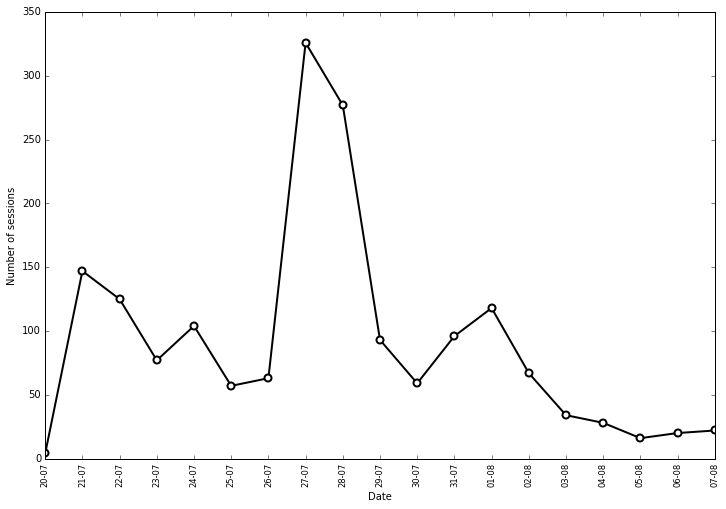

In [34]:
f1 = plt.figure(figsize=(12,8))
plt.plot(df1.sessions, '-ko', lw = 2, markerfacecolor = 'white', markersize = 7, markeredgewidth = 2)
plt.xticks(range(len(df1.sessions)), df1.date, size='small', rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Number of sessions')
plt.show()

## 5. Geographic mapping

To investigate the second question -- where do visitors come from? 
In this case, a world map is used that displays the number of visitors per country, using different color scales. For this purpose, we make a new
DataFrame df2 that sorts the countries on number of sessions.

df2 = []

conn = GoogleAnalyticsQuery(secrets='/your-directory/ga-creds/client_secret.json', token_file_name='/your-directory/ga-creds/analytics.dat')

query = {\
'ids' : '999999999',
'metrics' : 'sessions',
'dimensions' : 'country',
'sort' : '-sessions',
'start_date' : '2017-07-20',
'end_date' : '2017-08-07'
}
                            
df2, metadata = conn.execute_query(**query)

The top 10 countries in terms of visitors are the following

In [47]:
df2.head(10)

,country,sessions
0,United States,589
1,India,95
2,Germany,91
3,United Kingdom,77
4,Australia,54
5,France,50
6,Canada,47
7,Brazil,44
8,Poland,44
9,South Korea,40


It turns out that visitors come from 80 countries,

In [48]:
len(df2)

80

To get a better impression of the real number of sessions from "top 30" countries, wecould make a barplot

In [49]:
ndd = df2.head(30)

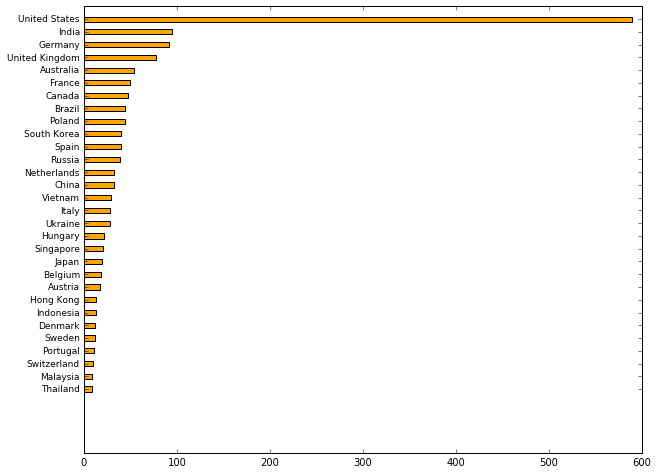

In [50]:
fig = plt.figure(figsize=(10, 8), facecolor='w')
fig.subplots_adjust(wspace=0.2)
ax1 = plt.subplot(1,1,1)
barwd = 0.6
r1=range(len(ndd))
ax1.barh(r1, ndd.sort_values(by='sessions', ascending=True).sessions, height=0.4, align="center", color="orange")
ax1.set_yticks(r1)
ax1.set_yticklabels(ndd.sort_values(by='sessions', ascending=True).country, size=9)
plt.show()

## 6. Device

The third question, what kind of devices do my visitors use? can be best answered using a piechart, since it nicely illustrates the proportions.

df3 = []

conn = GoogleAnalyticsQuery(secrets='/your-directory/ga-creds/client_secret.json', token_file_name='/your-directory/ga-creds/analytics.dat')

query = {
'ids' : '999999999',
'metrics' : 'sessions',
'dimensions' : 'deviceCategory',
'sort' : '-sessions',
'start_date' : '2017-07-20',
'end_date' : '2017-08-07'
}

df3, metadata = conn.execute_query(**query)


In [83]:
df3.head()

,deviceCategory,sessions
0,desktop,1182
1,mobile,478
2,tablet,73


For this purpose we are going to use Plotly, but one could equally well do this using for example Matplotlib.
Please be aware that you would need a so-called api-key to do this, which you will receive upon registration at the Plotly website

In [ ]:
plotly.tools.set_credentials_file(username='your_plotly_username', api_key='your_plotly_API_password')

In [91]:
fig = {
    'data': [{'labels': df3.deviceCategory,
              'values': df3.sessions,
              'type': 'pie'
             }
            ],
    'layout': {'title': 'Number of sessions as a function of device'}
    }


In [92]:
py.iplot(fig)

The pie chart shows that a large majority of the visitors used a desktop. Does this change from one week to another week? 
It would be possible to show the change in device use over time using multiple pie charts. First, we make two datasets, a dataset for the first and second week, df3a and df3b respectively.

df3a = []

conn = GoogleAnalyticsQuery(secrets='/your-directory/ga-creds/client_secret.json', token_file_name='/your-directory/ga-creds/analytics.dat')

query = {
'ids' : '999999999',
'metrics' : 'sessions',
'dimensions' : 'deviceCategory',
'sort' : '-sessions',
'start_date' : '2017-07-20',
'end_date' : '2017-07-26'
}

df3a, metadata = conn.execute_query(**query)

df3b = []

conn = GoogleAnalyticsQuery(secrets='/your-directory/ga-creds/client_secret.json', token_file_name='/your-directory/ga-creds/analytics.dat')

query = {
'ids' : '999999999',
'metrics' : 'sessions',
'dimensions' : 'deviceCategory',
'sort' : '-sessions',
'start_date' : '2017-07-27',
'end_date' : '2017-08-02'
}

df3b, metadata = conn.execute_query(**query)


In [95]:
df3a.head()

,deviceCategory,sessions
0,desktop,423
1,mobile,136
2,tablet,18


In [96]:
df3b.head()

,deviceCategory,sessions
0,desktop,695
1,mobile,293
2,tablet,48


Goal is to display the piecharts for the 1st and 2nd week. It would be important to use the domain parameter to set the position of the charts. Further parameters can be found in the official Plotly documentation

In [97]:
fig = {
'data': [
{
'labels': df3a.deviceCategory,
'values': df3a.sessions,
'type': 'pie',
'domain': {'x': [0, .48], 'y': [.21, 1]},
'name': '1st Week'
},
{
'labels': df3b.deviceCategory,
'values': df3b.sessions,
'type': 'pie',
'domain': {'x': [.49, .97], 'y': [.21, 1]},
'name': '2nd Week'
}
],
'layout': {'title': 'Device use over time',
'showlegend': False}
}
py.iplot(fig)

Insights: The number of mobile sessions increased slightly while the number of desktop sessions decreased. 
If this is just noise or a real shift in sessions could be probably best evaluated using more timepoints.

## 7. Closing words

Webtraffic allows a wide variety of potentially interesting analyses which is usefull for Marketing team for fine tuning strategy . 
Lots of other measures can be explored. 

1.Is webtraffic different during certain hours or weekdays?.

2.What is the duration that visitors stay on the website?

3.From which websites are users referred?

4.Is there a change in geographic distribution over time?

Bringing webtraffic data to Python is rewarding for several reasons. Python can automate basic to advanced analyses. 
After programming the analysis pipeline, a single button press can produce the desired analyses and visualizations in a report.
And last but not least, periodical updates can be produced on a regular basis,customized to your goals.